# From 0 to machine learning - discover neural network's internalities

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import inspect
import re
    
def show_loss_on_distribution(distribution, w, loss):
    plt.plot(distribution, 'g-')
    plt.plot(w, loss, 'rx')
    plt.show()

def show_gradient_on_distribution(distribution, w, loss, gradient):
    plt.plot(distribution, 'g-')
    plt.arrow(w, loss, 1, gradient, width=0.2, color="red", length_includes_head=True)
    plt.show()

def print_vars(*variables):
    for index in range(len(variables)):
        frame = inspect.currentframe().f_back
        s = inspect.getframeinfo(frame).code_context[0]
        r = re.search(r"\((.*)\)", s).group(1)
        print("{} = {}".format(r.split(", ")[index],variables[index]))

### One single input, no training

prediction = 0
loss = 100
gradient = -20


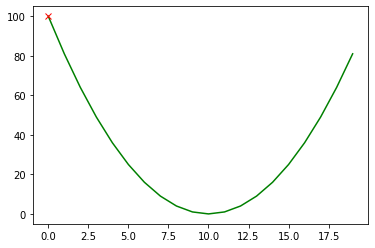

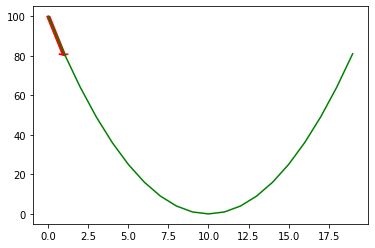

In [2]:
# y = w * x

x = 1
y = 10 * x
w = 0 # random starting w

def multiply(x, w):
    return x * w

def calculate_d_multiply(x, w):
    return x

def calculate_loss(prediction, y):
    return (prediction - y) ** 2

def calculate_d_loss(prediction, y):
    return 2 * (prediction - y)

loss_distribution = [ calculate_loss(multiply(x, w), y) for w in range(20) ]

prediction = multiply(x, w)
loss = calculate_loss(prediction, y) # loss(multiply(x,w), y) --> d_loss/d_multiply * d_multiply/d_w
d_multiply = calculate_d_multiply(x, w)
d_loss = calculate_d_loss(prediction, y)
gradient = d_multiply * d_loss

print_vars(prediction, loss, gradient)
show_loss_on_distribution(loss_distribution, w, loss)
show_gradient_on_distribution(loss_distribution, w, loss, gradient)

### One single input, training

------------------------------
loss = 100


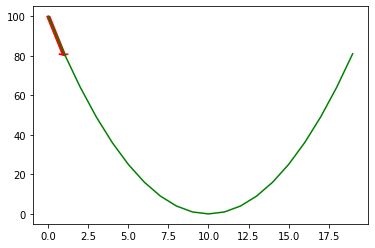

------------------------------
loss = 64.0


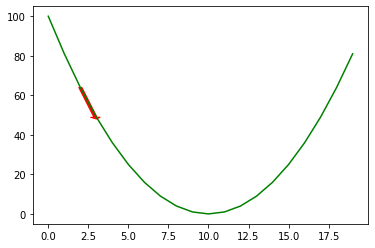

------------------------------
loss = 40.96000000000001


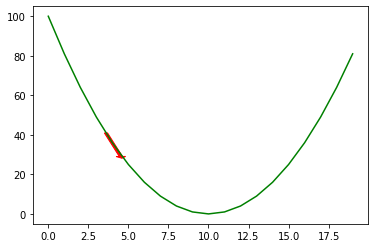

------------------------------
loss = 26.21439999999999


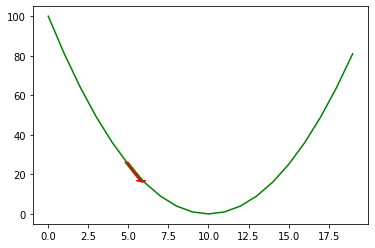

------------------------------
loss = 16.777215999999992


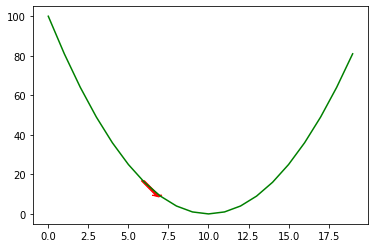

In [3]:
# y = w * x

x = 1
y = 10 * x

def multiply(x, w):
    return x * w

def calculate_d_multiply(x, w):
    return x

def calculate_loss(prediction, y):
    return (prediction - y) ** 2

def calculate_d_loss(prediction, y):
    return 2 * (prediction - y)

loss_distribution = [ calculate_loss(multiply(x, w), y) for w in range(20) ]

w = 0 # random starting w
learning_rate = 0.1

for i in range(5):
    prediction = multiply(x, w)
    loss = calculate_loss(prediction, y)
    d_multiply = calculate_d_multiply(x, w)
    d_loss = calculate_d_loss(prediction, y)
    gradient = d_multiply * d_loss

    print("------------------------------")
    print_vars(loss)
    show_gradient_on_distribution(loss_distribution, w, loss, gradient)
    
    w = w - gradient * learning_rate

### Many single inputs

In [4]:
# y = w * x

x = np.expand_dims(np.arange(4), 1)
y = 10 * x

print_vars(x) # 4x1
print_vars(y) # 4x1
print_vars(w) # 1x1

def multiply(x, w):
    return x * w

def calculate_d_multiply(x, w):
    return x #4x1

def calculate_loss(prediction, y):
    return np.mean(np.power(prediction - y, 2)) #1x1

def calculate_d_loss(prediction, y):
    return 2 * (prediction - y) / y.shape[0] #4x1

def train(x, y, steps, learning_rate):
    w = 0
    for i in range(steps):
        prediction = multiply(x, w)
        loss = calculate_loss(prediction, y)
        d_multiply = calculate_d_multiply(x, w) #4x1
        d_loss = calculate_d_loss(prediction, y) #4x1
        gradient = np.matmul(d_multiply.T, d_loss) #1x4 * 4x1

        if i % 10 == 0:
            print("------------------------------")
            print_vars(loss, gradient)

        w = w - gradient * learning_rate
    return w

w = train(x, y, 50, 0.1)
print("------------------------------")
prediction = multiply(x, w)
print_vars(prediction, y, w)

x = [[0]
 [1]
 [2]
 [3]]
y = [[ 0]
 [10]
 [20]
 [30]]
w = 6.7232
------------------------------
loss = 350.0
gradient = [[-70.]]
------------------------------
loss = 1.2203745403812015e-08
gradient = [[-0.00041334]]
------------------------------
loss = 4.2552133760823646e-19
gradient = [[-2.44075782e-09]]
------------------------------
loss = 1.6566079009641248e-29
gradient = [[-1.50990331e-14]]
------------------------------
loss = 0.0
gradient = [[0.]]
------------------------------
prediction = [[ 0.]
 [10.]
 [20.]
 [30.]]
y = [[ 0]
 [10]
 [20]
 [30]]
w = [[10.]]


### Many single inputs, with bias

In [5]:
# y = w * x + b

x = np.expand_dims(np.arange(4), 1)
y = 10 * x + 100

ones = np.ones((x.shape[0], 1))
x = np.hstack((x, ones))

print_vars(x) # 4x1
print_vars(y) # 4x1
print_vars(w) # 1x1

def multiply(x, w):
    return np.matmul(x, w) #4x2 * 2x1

def calculate_d_multiply(x, w):
    return x #4x2

def calculate_loss(prediction, y):
    return np.mean(np.power(prediction - y, 2)) #1x1

def calculate_d_loss(prediction, y):
    return 2 * (prediction - y) / y.shape[0] #4x1

def train(x, y, steps, learning_rate):
    w = np.zeros((2, 1))
    for i in range(steps):
        prediction = multiply(x, w)
        loss = calculate_loss(prediction, y)
        d_multiply = calculate_d_multiply(x, w) #4x2
        d_loss = calculate_d_loss(prediction, y) #4x1
        gradient = np.matmul(d_multiply.T, d_loss) #2x4 * 4x1 -> 2x1

        if i % 100 == 0:
            print("------------------------------")
            print_vars(loss, gradient)

        w = w - gradient * learning_rate
    return w

w = train(x, y, 1000, 0.1)
print("------------------------------")
prediction = multiply(x, w)
print_vars(prediction, y, w)

x = [[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]]
y = [[100]
 [110]
 [120]
 [130]]
w = [[10.]]
------------------------------
loss = 13350.0
gradient = [[-370.]
 [-230.]]
------------------------------
loss = 0.010435309143555043
gradient = [[ 0.04726129]
 [-0.10090482]]
------------------------------
loss = 4.9138083838323526e-08
gradient = [[ 0.00010256]
 [-0.00021896]]
------------------------------
loss = 2.3138281995321895e-13
gradient = [[ 2.22545331e-07]
 [-4.75143516e-07]]
------------------------------
loss = 1.0895396518183599e-18
gradient = [[ 4.82884843e-10]
 [-1.03106856e-09]]
------------------------------
loss = 5.1101021045023956e-24
gradient = [[ 1.08002496e-12]
 [-2.21689334e-12]]
------------------------------
loss = 2.5243548967072378e-27
gradient = [[ 7.10542736e-15]
 [-5.68434189e-14]]
------------------------------
loss = 2.5243548967072378e-27
gradient = [[ 7.10542736e-15]
 [-5.68434189e-14]]
------------------------------
loss = 2.5243548967072378e-27
gradient = [[ 7.10

### Many inputs, use 'identity' activation

In [6]:
# y = w * x + b

x = np.expand_dims(np.arange(4), 1)
y = 10 * x + 100

ones = np.ones((x.shape[0], 1))
x = np.hstack((x, ones))

print_vars(x) # 4x1
print_vars(y) # 4x1
print_vars(w) # 1x1

def multiply(x, w):
    return np.matmul(x, w) #4x2 * 2x1

def calculate_d_multiply(x, w):
    return x #4x2

def activate(x):
    return x

def calculate_d_activate(x):
    return np.ones(x.shape)

def calculate_loss(prediction, y):
    return np.mean(np.power(prediction - y, 2)) #1x1

def calculate_d_loss(prediction, y):
    return 2 * (prediction - y) / y.shape[0] #4x1

def train(x, y, steps, learning_rate):
    w = np.zeros((2, 1))
    for i in range(steps):
        weighted_sum = multiply(x, w)
        prediction = activate(weighted_sum)
        loss = calculate_loss(prediction, y)
        
        d_multiply = calculate_d_multiply(x, w) #4x2
        d_activate = calculate_d_activate(weighted_sum) #4x1
        d_loss = calculate_d_loss(prediction, y) #4x1
        
        gradient = np.matmul(d_multiply.T, d_activate * d_loss) #2x4 * ( 4x1 .* 4x1 ) -> 2x1

        if i % 100 == 0:
            print("------------------------------")
            print_vars(loss, gradient)

        w = w - gradient * learning_rate
    return w

w = train(x, y, 1000, 0.1)
print("------------------------------")
prediction = activate(multiply(x, w))
print_vars(prediction, y, w)

x = [[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]]
y = [[100]
 [110]
 [120]
 [130]]
w = [[ 10.]
 [100.]]
------------------------------
loss = 13350.0
gradient = [[-370.]
 [-230.]]
------------------------------
loss = 0.010435309143555043
gradient = [[ 0.04726129]
 [-0.10090482]]
------------------------------
loss = 4.9138083838323526e-08
gradient = [[ 0.00010256]
 [-0.00021896]]
------------------------------
loss = 2.3138281995321895e-13
gradient = [[ 2.22545331e-07]
 [-4.75143516e-07]]
------------------------------
loss = 1.0895396518183599e-18
gradient = [[ 4.82884843e-10]
 [-1.03106856e-09]]
------------------------------
loss = 5.1101021045023956e-24
gradient = [[ 1.08002496e-12]
 [-2.21689334e-12]]
------------------------------
loss = 2.5243548967072378e-27
gradient = [[ 7.10542736e-15]
 [-5.68434189e-14]]
------------------------------
loss = 2.5243548967072378e-27
gradient = [[ 7.10542736e-15]
 [-5.68434189e-14]]
------------------------------
loss = 2.5243548967072378e-27
gradient 

### Many inputs, use 'sigmoid' activation

In [7]:
# y = w * x + b

x = np.expand_dims(np.arange(4), 1)
y = x > 1

ones = np.ones((x.shape[0], 1))
x = np.hstack((x, ones))

print_vars(x) # 4x1
print_vars(y) # 4x1
print_vars(w) # 1x1

def multiply(x, w):
    return np.matmul(x, w) #4x2 * 2x1

def calculate_d_multiply(x, w):
    return x #4x2

def activate(x):
    return 1 / (1 + np.exp(-x))

def calculate_d_activate(x):
    return activate(x) * (1 - activate(x))

def calculate_loss(prediction, y):
    return np.mean(np.power(prediction - y, 2)) #1x1

def calculate_d_loss(prediction, y):
    return 2 * (prediction - y) / y.shape[0] #4x1

def train(x, y, steps, learning_rate):
    w = np.zeros((2, 1))
    for i in range(steps):
        weighted_sum = multiply(x, w)
        prediction = activate(weighted_sum)
        loss = calculate_loss(prediction, y)
        
        d_multiply = calculate_d_multiply(x, w) #4x2
        d_activate = calculate_d_activate(weighted_sum) #4x1
        d_loss = calculate_d_loss(prediction, y) #4x1
        
        gradient = np.matmul(d_multiply.T, d_activate * d_loss) #2x4 * ( 4x1 .* 4x1 ) -> 2x1

        if i % 1000 == 0:
            print("------------------------------")
            print_vars(loss, gradient)

        w = w - gradient * learning_rate
    return w

w = train(x, y, 10000, 0.1)
print("------------------------------")
prediction = activate(multiply(x, w))
print_vars(prediction, y, w)

x = [[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]]
y = [[False]
 [False]
 [ True]
 [ True]]
w = [[ 10.]
 [100.]]
------------------------------
loss = 0.25
gradient = [[-0.25]
 [ 0.  ]]
------------------------------
loss = 0.0367261539079942
gradient = [[-0.00853825]
 [ 0.01344936]]
------------------------------
loss = 0.021553752842768118
gradient = [[-0.00522883]
 [ 0.0080346 ]]
------------------------------
loss = 0.01495469238969905
gradient = [[-0.00376808]
 [ 0.0057471 ]]
------------------------------
loss = 0.011294450783913628
gradient = [[-0.00292317]
 [ 0.00444273]]
------------------------------
loss = 0.008997996214566664
gradient = [[-0.00237455]
 [ 0.00360137]]
------------------------------
loss = 0.007437540413230931
gradient = [[-0.0019918 ]
 [ 0.00301663]]
------------------------------
loss = 0.0063153633407563746
gradient = [[-0.00171085]
 [ 0.00258849]]
------------------------------
loss = 0.005473363593932757
gradient = [[-0.00149656]
 [ 0.00226252]]
------------------

### Many inputs, many outputs

In [8]:
# y = w * x + b

x = np.expand_dims(np.arange(4), 1)

y1 = x > 1
y2 = x > 0
y = np.hstack((y1, y2))

ones = np.ones((x.shape[0], 1))
x = np.hstack((x, ones))

print_vars(x) # 4x1
print_vars(y) # 4x1
print_vars(w) # 1x1

def multiply(x, w):
    return np.matmul(x, w) #4x2 * 2x1

def calculate_d_multiply(x, w):
    return x #4x2

def activate(x):
    return 1 / (1 + np.exp(-x))

def calculate_d_activate(x):
    return activate(x) * (1 - activate(x))

def calculate_loss(prediction, y):
    return np.mean(np.power(prediction - y, 2)) #1x1

def calculate_d_loss(prediction, y):
    return 2 * (prediction - y) / y.shape[0] #4x1

def train(x, y, steps, learning_rate):
    w = np.zeros((2, 1))
    for i in range(steps):
        weighted_sum = multiply(x, w)
        prediction = activate(weighted_sum)
        loss = calculate_loss(prediction, y)
        
        d_multiply = calculate_d_multiply(x, w) #4x2
        d_activate = calculate_d_activate(weighted_sum) #4x1
        d_loss = calculate_d_loss(prediction, y) #4x1
        
        gradient = np.matmul(d_multiply.T, d_activate * d_loss) #2x4 * ( 4x1 .* 4x1 ) -> 2x1

        if i % 1000 == 0:
            print("------------------------------")
            print_vars(loss, prediction)

        w = w - gradient * learning_rate
    return w

w = train(x, y, 10000, 0.1)
print("------------------------------")
prediction = activate(multiply(x, w))
print_vars(prediction, y, w)

x = [[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]]
y = [[False False]
 [False  True]
 [ True  True]
 [ True  True]]
w = [[ 4.59320047]
 [-6.75325165]]
------------------------------
loss = 0.25
prediction = [[0.5]
 [0.5]
 [0.5]
 [0.5]]
------------------------------
loss = 0.027894593879453693
prediction = [[0.05243558 0.21776334]
 [0.30443518 0.83058996]
 [0.77587328 0.98855144]
 [0.9647642  0.99934285]]
------------------------------
loss = 0.015378695126702192
prediction = [[0.01947346 0.15002386]
 [0.23307708 0.88043055]
 [0.82302865 0.99675517]
 [0.98614317 0.99992197]]
------------------------------
loss = 0.010413583118485902
prediction = [[0.00999125 0.11954033]
 [0.19378058 0.90409548]
 [0.85128883 0.99847457]
 [0.99271857 0.999978  ]]
------------------------------
loss = 0.007775666266440556
prediction = [[0.00605788 0.10164906]
 [0.16816702 0.91818198]
 [0.8702274  0.99910235]
 [0.99552434 0.99999094]]
------------------------------
loss = 0.006157515066146873
prediction = [[0.004070